<h1>Hábitos de Consumo de Mídia X Entretenimento</h1>

O objetivo deste notebook é realizar uma análise estatística aplicada à um conjunto de dados gerado a partir de respostas de um formulário. As perguntas deste formulário foram elaboradas para que seja possível traçar algumas relações e indicativos entre os hábitos de consumo de mídia de uma pessoa e sua satisfação com o nível de entretenimento em seu cotidiano.

In [1]:
import pandas as pd

#Primeiramente, iremos carregar os dados do arquivo CSV, gerado a partir do Google Forms.

df = pd.read_csv('Hábitos de Consumo de Mídia X Entretenimento.csv\Hábitos de Consumo de Mídia X Entretenimento.csv', sep=',')
print(df.columns)


Index(['Carimbo de data/hora', 'Nome de usuário', 'tipo_midia',
       'qualidade_midia', 'quantidade_plataformas', 'horas_dia',
       'dispositivo_principal', 'satisfacao_entretenimento',
       'novo_conteudo_semanal', 'gasto_mensal'],
      dtype='object')


In [ ]:
# Medidas para variáveis quantitativas


# Horas diárias de consumo
media_horas = df['horas_dia'].mean()
mediana_horas = df['horas_dia'].median()
moda_horas = df['horas_dia'].mode()[0]
desvio_padrao_horas = df['horas_dia'].std()
proporcao_mais_3h = (df['horas_dia'] > 3).mean()


# Gasto mensal com entretenimento
media_gasto = df['gasto_mensal'].mean()
mediana_gasto = df['gasto_mensal'].median()
moda_gasto = df['gasto_mensal'].mode()[0]
desvio_padrao_gasto = df['gasto_mensal'].std()
proporcao_mais_100 = (df['gasto_mensal'] > 100).mean()

# Número de plataformas de streaming
media_quantidade = df['quantidade_plataformas'].mean()
mediana_quantidade = df['quantidade_plataformas'].median()
moda_quantidade = df['quantidade_plataformas'].mode()[0]
desvio_padrao_quantidade = df['quantidade_plataformas'].std()
proporcao_mais_3 = (df['quantidade_plataformas'] > 3).mean()

# Frequência novos conteúdos
media_novidade = df['novo_conteudo_semanal'].mean()
mediana_novidade = df['novo_conteudo_semanal'].median()
moda_novidade = df['novo_conteudo_semanal'].mode()[0]
desvio_padrao_novidade = df['novo_conteudo_semanal'].std()
proporcao_mais_5 = (df['novo_conteudo_semanal'] > 5).mean()

# Exibindo resultados
print("Horas Diárias de Consumo:")
print(f"Média: {media_horas:.2f}, Mediana: {mediana_horas:.2f}, Moda: {moda_horas}, Desvio Padrão: {desvio_padrao_horas:.2f}")
print(f"Proporção > 3h: {proporcao_mais_3h:.2%}\n")

print("Gasto Mensal com Entretenimento:")
print(f"Média: {media_gasto:.2f}, Mediana: {mediana_gasto:.2f}, Moda: {moda_gasto}, Desvio Padrão: {desvio_padrao_gasto:.2f}")
print(f"Proporção > R$100: {proporcao_mais_100:.2%}\n")

print("Número de plataformas de streaming:")
print(f"Média: {media_quantidade:.2f}, Mediana: {mediana_quantidade:.2f}, Moda: {moda_quantidade}, Desvio Padrão: {desvio_padrao_quantidade:.2f}")
print(f"Proporção > 3: {proporcao_mais_3:.2%}\n")

print("Frequência de novos conteúdos:")
print(f"Média: {media_novidade:.2f}, Mediana: {mediana_novidade:.2f}, Moda: {moda_novidade}, Desvio Padrão: {desvio_padrao_novidade:.2f}")
print(f"Proporção > 5: {proporcao_mais_5:.2%}\n")

Horas Diárias de Consumo:
Média: 2.53, Mediana: 3.00, Moda: 3.0, Desvio Padrão: 0.93
Proporção > 3h: 11.76%

Gasto Mensal com Entretenimento:
Média: 130.00, Mediana: 100.00, Moda: 100, Desvio Padrão: 137.52
Proporção > R$100: 23.53%

Número de plataformas de streaming:
Média: 2.59, Mediana: 3.00, Moda: 3, Desvio Padrão: 1.50
Proporção > 3: 23.53%

Frequência de novos conteúdos:
Média: 2.41, Mediana: 2.00, Moda: 1, Desvio Padrão: 1.70
Proporção > 5: 5.88%



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tabelas de Frequência


# Tipo principal de mídia
freq_abs_tipo = df['tipo_midia'].value_counts()
freq_rel_tipo = df['tipo_midia'].value_counts(normalize=True)
freq_acum_tipo = freq_rel_tipo.cumsum()
tabela_tipo = pd.DataFrame({
    'Frequência Absoluta': freq_abs_tipo,
    'Frequência Relativa': freq_rel_tipo,
    'Frequência Acumulada': freq_acum_tipo
})
print("Tabela de Frequência - Tipo Principal de Mídia:")
print(tabela_tipo, "\n")

# Avaliação da qualidade do conteúdo
freq_abs_qualidade = df['qualidade_midia'].value_counts().sort_index()
freq_rel_qualidade = df['qualidade_midia'].value_counts(normalize=True).sort_index()
freq_acum_qualidade = freq_rel_qualidade.cumsum()
tabela_qualidade = pd.DataFrame({
    'Frequência Absoluta': freq_abs_qualidade,
    'Frequência Relativa': freq_rel_qualidade,
    'Frequência Acumulada': freq_acum_qualidade
})
print("Tabela de Frequência - Avaliação da Qualidade:")
print(tabela_qualidade, "\n")

# Horas diárias (categorizadas)
bins = [0, 1, 2, 3, 4, 5, float('inf')]
labels = ['0-1h', '1-2h', '2-3h', '3-4h', '4-5h', '>5h']
df['horas_categoria'] = pd.cut(df['horas_dia'], bins=bins, labels=labels)
freq_abs_horas = df['horas_categoria'].value_counts().sort_index()
freq_rel_horas = df['horas_categoria'].value_counts(normalize=True).sort_index()
freq_acum_horas = freq_rel_horas.cumsum()
tabela_horas = pd.DataFrame({
    'Frequência Absoluta': freq_abs_horas,
    'Frequência Relativa': freq_rel_horas,
    'Frequência Acumulada': freq_acum_horas
})
print("Tabela de Frequência - Horas Diárias de Consumo:")
print(tabela_horas, "\n")

Tabela de Frequência - Tipo Principal de Mídia:
               Frequência Absoluta  Frequência Relativa  Frequência Acumulada
tipo_midia                                                                   
Redes Sociais                   11             0.647059              0.647059
Música                           3             0.176471              0.823529
Jogos                            2             0.117647              0.941176
Séries/Filmes                    1             0.058824              1.000000 

Tabela de Frequência - Avaliação da Qualidade:
                 Frequência Absoluta  Frequência Relativa  \
qualidade_midia                                             
Alta                              10             0.588235   
Baixa                              1             0.058824   
Muito alta                         2             0.117647   
Média                              4             0.235294   

                 Frequência Acumulada  
qualidade_midia             

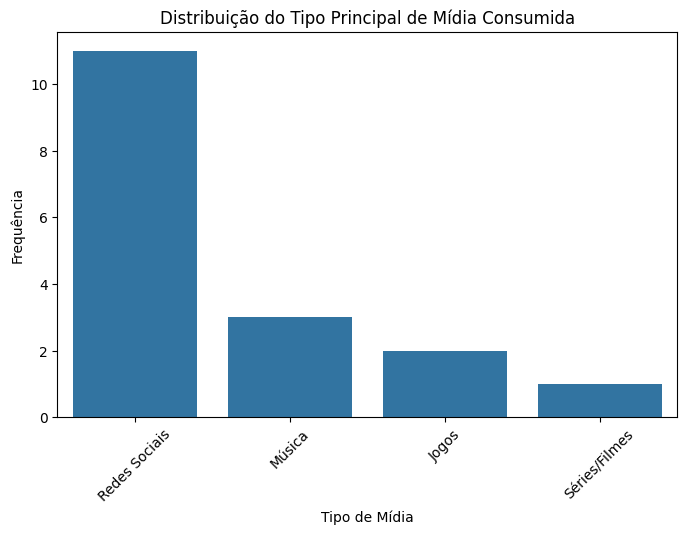

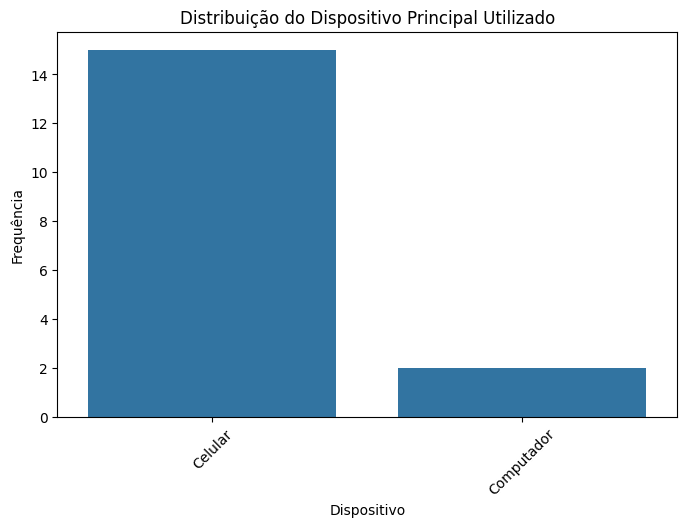

In [ ]:
# Gráficos
# Tipo principal de mídia
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='tipo_midia', order=df['tipo_midia'].value_counts().index)
plt.title('Distribuição do Tipo Principal de Mídia Consumida')
plt.xlabel('Tipo de Mídia')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.savefig('tipo_midia.png')

# Dispositivo principal
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='dispositivo_principal', order=df['dispositivo_principal'].value_counts().index)
plt.title('Distribuição do Dispositivo Principal Utilizado')
plt.xlabel('Dispositivo')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.savefig('dispositivo_principal.png')